In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape[0],X_test.shape[0]

(60000, 10000)

In [ ]:
X_clean = np.concatenate((X_train,X_test))
y_digit = np.concatenate((y_train,y_test))
X_clean.shape,y_digit.shape

((70000, 28, 28), (70000,))

In [ ]:
X_clean = X_clean/255.0

In [ ]:
def show(img):
  plt.matshow(img,cmap='gray')

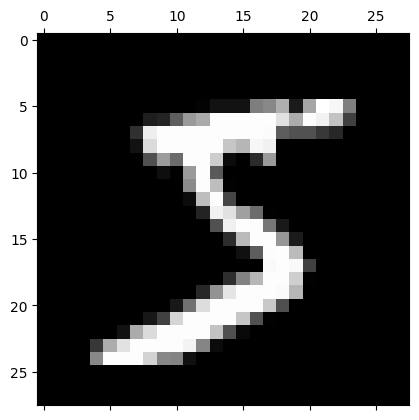

In [ ]:
show(X_clean[0])

In [ ]:
import copy

In [ ]:
def add_noise_to_image(img, probability=0.2, noise_intensity=0.05):
    """
    Add random noise to image data with a specified probability.

    Parameters:
    - image_data: NumPy array representing the image.
    - probability: Probability of adding noise to each pixel.
    - noise_intensity: Intensity of the noise (adjustable).

    Returns:
    - Image data with added noise.
    """
    image_data=copy.deepcopy(img)
    # Create a mask based on the specified probability
    mask = np.random.choice([0, 1], size=image_data.shape, p=[1 - probability, probability])

    # Generate random noise
    noise = np.random.normal(loc=0, scale=noise_intensity, size=image_data.shape)

    # Apply the mask to add noise
    noisy_image = image_data + mask * noise

    noisy_image = np.clip(noisy_image, 0, 1)

    return noisy_image.astype(np.float32)

# Example usage:
# Assuming 'image_data' is a NumPy array representing the image
# noisy_image = add_noise_to_image(image_data, probability=0.2, noise_intensity=25)



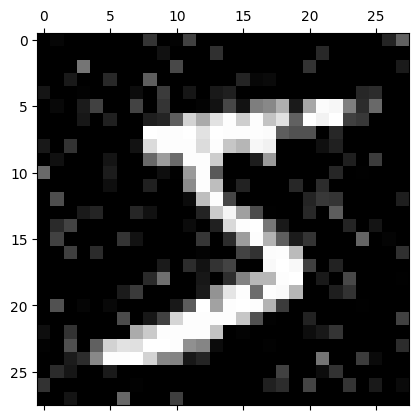

In [ ]:
noisy_image = add_noise_to_image(X_clean[0], probability = 0.4,noise_intensity=0.2)
show(noisy_image)

In [ ]:
X_noisy=[]
for i in range(X_clean.shape[0]):
  X_noisy.append(add_noise_to_image(X_clean[i], probability = 0.3,noise_intensity=0.15))
X_noisy=np.array(X_noisy)
X_noisy.shape

(70000, 28, 28)

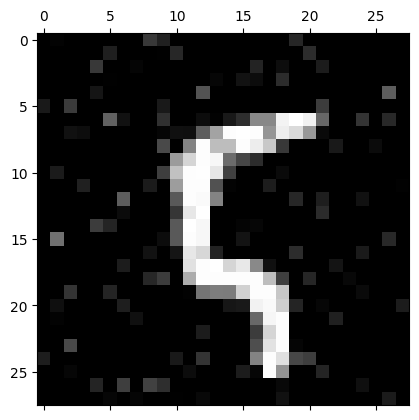

In [ ]:
show(X_noisy[100])

In [ ]:
X_noisy_train,X_noisy_test,X_clean_train,X_clean_test,y_digit_train, y_digit_test = train_test_split(X_noisy, X_clean,y_digit ,test_size=0.2, random_state=42)

In [ ]:
X_noisy_test.shape

(14000, 28, 28)

In [ ]:
input_shape =(28,28,1)

In [ ]:
def final_model(input_shape):
    # Encoder
    input_layer = tf.keras.layers.Input(shape=input_shape)
    flattened = tf.keras.layers.Flatten()(input_layer)
    encoded = tf.keras.layers.Dense(32, activation='relu')(flattened)

    # Decoder
    decoded = tf.keras.layers.Dense(input_shape[0]*input_shape[1]*input_shape[2], activation='sigmoid')(encoded)
    reshaped = tf.keras.layers.Reshape((input_shape[0], input_shape[1], input_shape[2]))(decoded)

    # Create autoencoder model
    autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=reshaped)

    return autoencoder


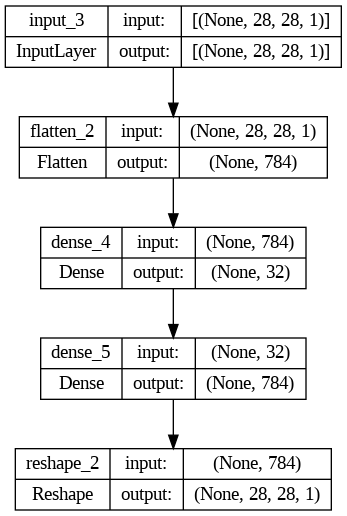

In [ ]:
model = final_model(input_shape)
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
                loss = 'mse',
                metrics = 'mse')

In [ ]:
history=model.fit(
    X_noisy_train,
     X_clean_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_noisy_test, X_clean_test)
)

Epoch 1/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 2/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 3/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 5/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 7/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 8/10
1750/1750 [==============================] - 5s 3ms

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

In [ ]:
model_path = "/content/drive/MyDrive/Deep Learning/denoising_autoencoder_FCNN.h5"
model = tf.keras.models.load_model(model_path)

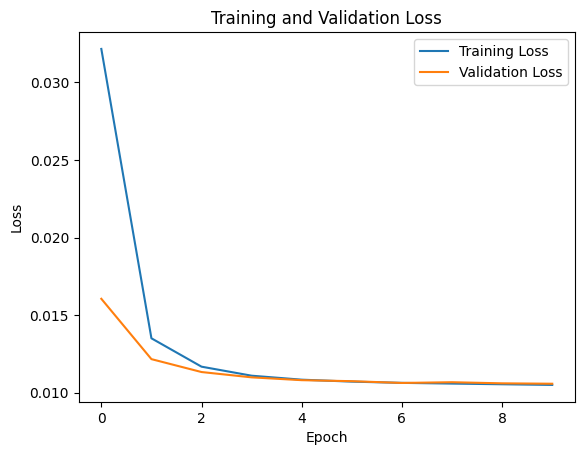

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
rnd = np.random.randint(0,X_noisy_test.shape[0])
print(rnd)
a = model.predict(np.array([X_noisy_test[rnd]]))

9256
1/1 [==============================] - 0s 68ms/step


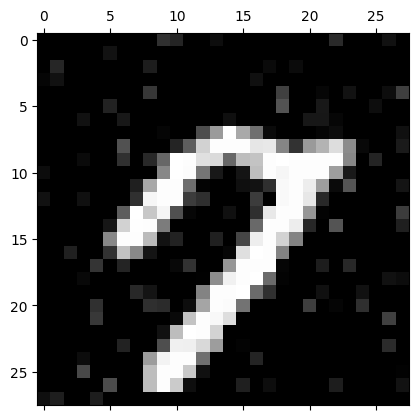

In [ ]:
show(X_noisy_test[rnd])

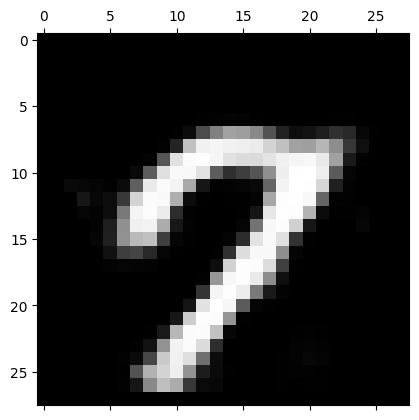

In [ ]:
show(a[0])

In [ ]:
X_noisy_test_rec = model.predict(X_noisy_test)

438/438 [==============================] - 1s 2ms/step


<ipython-input-74-a75f7947afb4>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, num_samples, i)


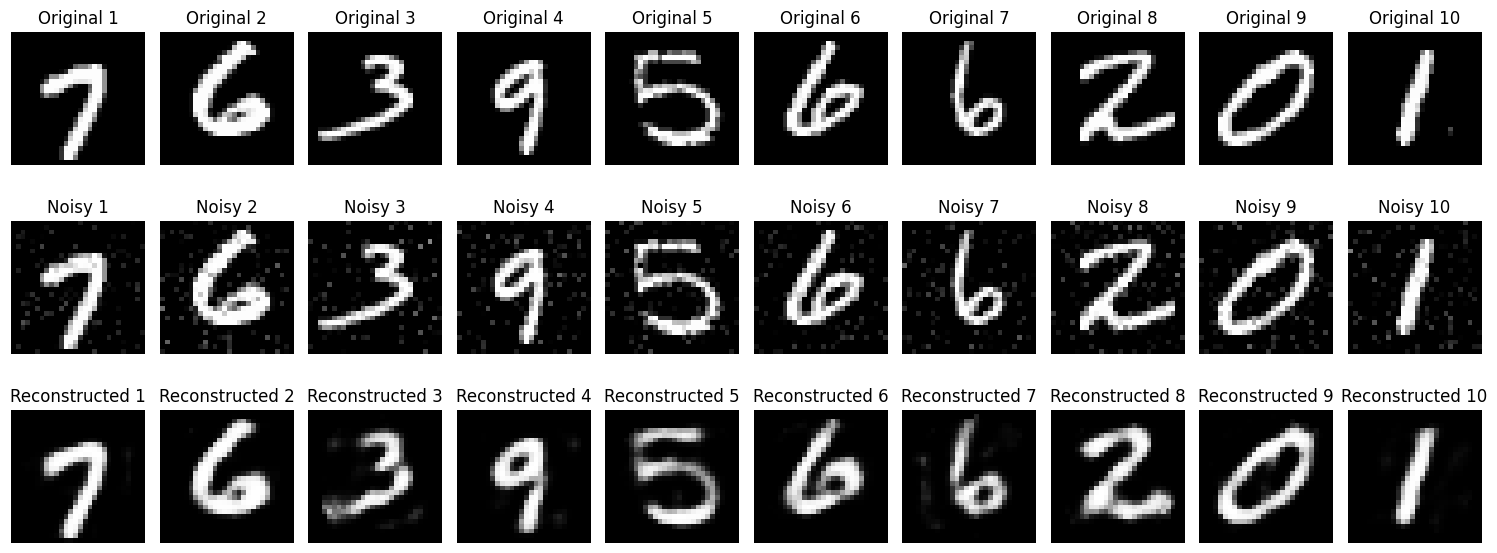

In [ ]:
num_samples = 10

# Randomly select 10 indices for visualization
sample_indices = np.random.choice(X_noisy_test_rec.shape[0], num_samples, replace=False)

# Plot the images
plt.figure(figsize=(15, 6))
plt.title("For 20% noise")
for i, index in enumerate(sample_indices, 1):
    # Original (Clean) Image
    plt.subplot(3, num_samples, i)
    plt.imshow(X_clean_test[index],cmap='gray')
    plt.title(f'Original {i}')
    plt.axis('off')

    # Noisy Image
    plt.subplot(3, num_samples, num_samples + i)
    plt.imshow(X_noisy_test[index],cmap='gray')
    plt.title(f'Noisy {i}')
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(3, num_samples, 2 * num_samples + i)
    plt.imshow(X_noisy_test_rec[index],cmap='gray')
    plt.title(f'Reconstructed {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

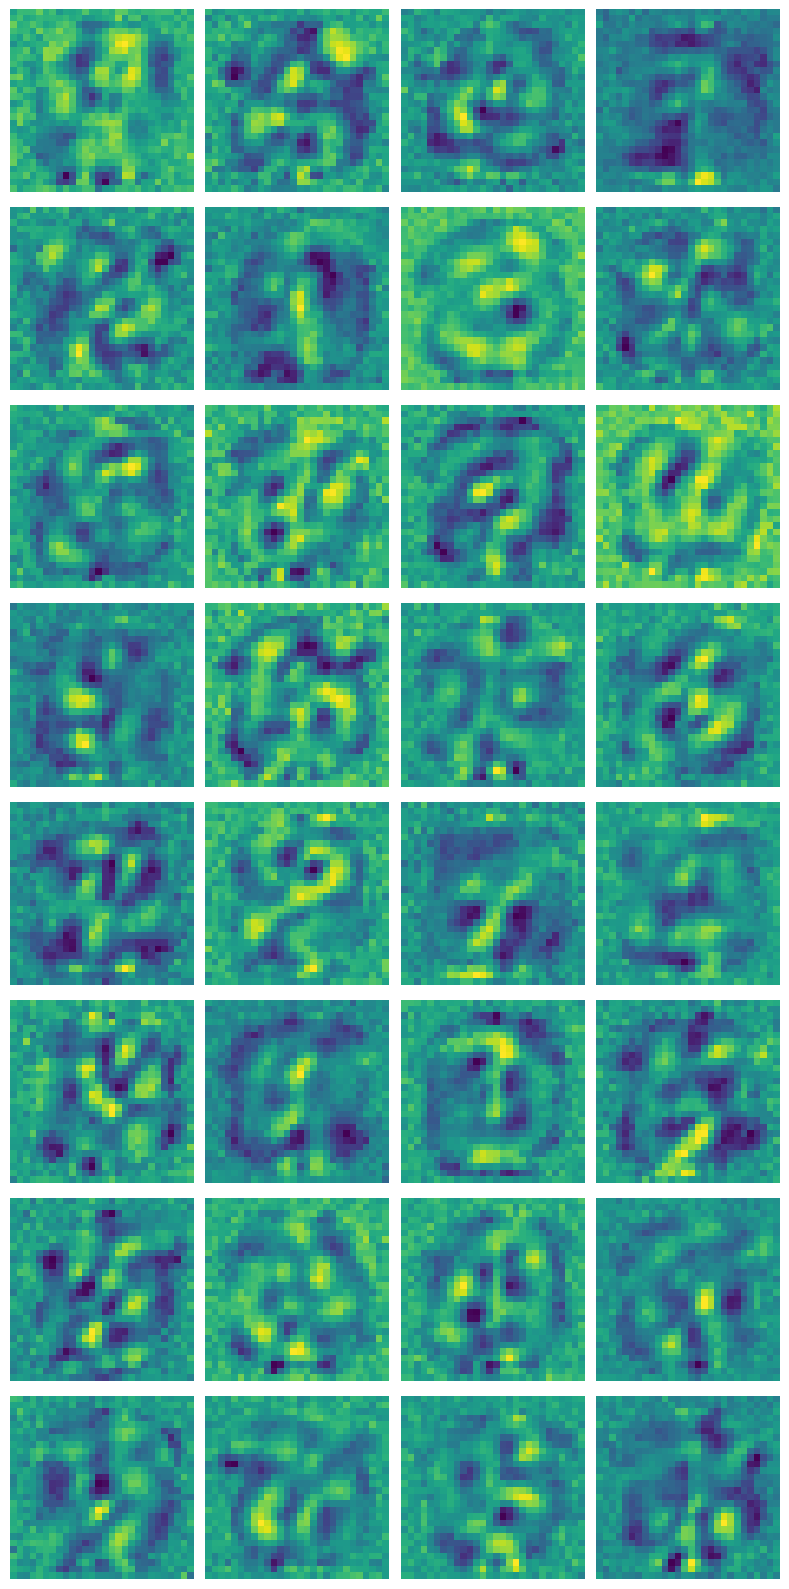

In [ ]:
encoder_weights = model.get_weights()[0]

# Reshape the weights for visualization
num_filters = encoder_weights.shape[1]
filter_size = int(np.sqrt(encoder_weights.shape[0]))

# Create a grid to display the filters (8 rows, 4 columns)
grid_rows = 8
grid_columns = 4

plt.figure(figsize=(grid_columns*2, grid_rows*2))

for i in range(num_filters):
    plt.subplot(grid_rows, grid_columns, i + 1)
    plt.imshow(encoder_weights[:, i].reshape(filter_size, filter_size))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
all_weights = model.get_weights()
